# Análisis Sísmico

In [1]:
#Importar las librerías necesarias
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy
sys.path.append(os.getcwd())
from lib import etabs_utils as etb
from lib import sismo_utils as sis
from lib import notebook_utils as ntb
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display


In [2]:
_,SapModel = etb.connect_to_etabs()

In [3]:
sismo = ntb.Sismo()

# Parámetros de Sitio

## Zonificación
![Factor de Zonifiación](./images/factor_zona.png)

## Factor de Suelo
![Factor de Suelo](./images/factor_suelo.png)


## Periodos del suelo
![Periodos del Suelo](./images/periodos_suelo.png)

## Sistema Estructural
![Sistema Estructural](./images/sistemas_estructurales.png)

## Factor de Amplificación sísmica
![Factor de Amplificacion Sísmica](./images/amplificacion_sismica.png)

## Factor de Importancia
![Factor de Importancia](./images/factor_importancia.png)

In [4]:
sismo.ubicacion()

In [5]:
sismo.parametros_e30()

# Irregularidades

In [6]:
sismo.irregularidades_e30()

# Parámetros Sísmicos

In [7]:
sismo.show_params()


 Parámetros de sitio:
Factor de zona: 
    Z=0.45
Factor de Importancia: 
    U=1.50
Factor de Suelo: 
    S=1.05
Periodos del Suelo: 
    Tp=0.60
    Tl=2.00
Factor Básico de Reducción:
    Rox=6.00
    Roy=7.00
Irregularidad en planta:
    Ip=1.00
Irregularidad en altura:
    Ia=1.00
Factor de Reducción:
    Rx=6.00
    Ry=7.00



# Cargas Sísmicas

In [8]:
sismo.select_loads(SapModel)

# Selección del Piso Base

In [9]:
sismo.select_base_story(SapModel)

Dropdown(description='Piso Base', options=('Story1', 'Story2', 'Story3'), style=DescriptionStyle(description_w…

# Periodos Modales

In [10]:
sismo.ana_modal(SapModel,report=True)


Análisis Modal:
Masa Participativa X: 1.00
Masa Participativa Y: 1.00
Periodo y Masa Participativa X: Tx=0.360, Ux=0.864
Periodo y Masa Participativa Y: Ty=0.273, Uy=0.872


,Mode,Period,UX,UY,RZ,SumUX,SumUY,SumRZ
0,1,0.36,0.864000,0.000000,2.486E-06,0.864,0,2.486E-06
1,2,0.273,0.000000,0.871800,1.513E-06,0.864,0.8718,4E-06
2,3,0.225,0.000011,0.000001,0.8499,0.864,0.8718,0.8499
3,4,0.101,0.118800,0.000000,4.188E-06,0.9828,0.8718,0.8499
4,5,0.077,0.000000,0.111900,0,0.9828,0.9837,0.8499
5,6,0.062,0.000000,0.000000,0.1317,0.9828,0.9837,0.9816
6,7,0.048,0.017200,0.000000,6.349E-07,1,0.9837,0.9816
7,8,0.037,0.000000,0.016300,0,1,1,0.9816
8,9,0.029,0.000002,0.000000,0.0184,1,1,1


# Análisis Estático

In [11]:
sismo.sismo_estatico(SapModel,report=True) 

Factor de Reduccion con Irregularidades en X: R=6.0
Factor de Reduccion con Irregularidades en Y: R=7.0
C en X: 2.50
C en Y: 2.50

Coeficiente de sismo estático X: 0.295
Coeficiente de sismo estático Y: 0.253
Exponente de altura X: 1.00
Exponente de altura Y: 1.00
Fuerza Cortante en X: 109.03
Fuerza Cortante en Y: 93.46


,Story,Weight,Height,H^kx,H^ky,PxHx,PxHy,ax,ay,vx,vy
0,Story3,90.122,12.2,12.2,12.2,1099.494,1099.494,0.368,0.368,40.177,34.437
1,Story2,135.809,8.6,8.6,8.6,1167.954,1167.954,0.391,0.391,42.678,36.581
2,Story1,143.284,5.0,5.0,5.0,716.420,716.420,0.240,0.240,26.179,22.439


# Espectro dinámico

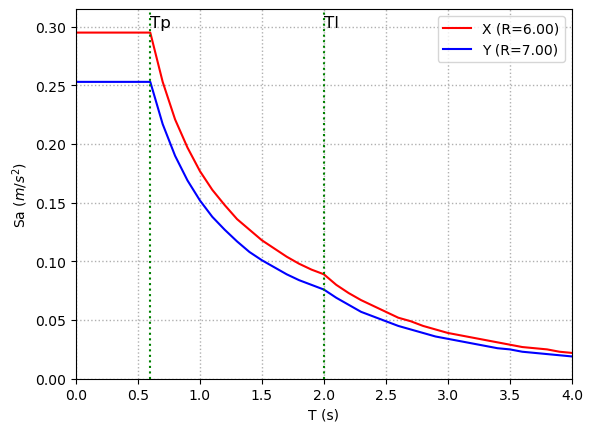

In [12]:
sismo.dinamic_spectrum(report=True)

# Fuerza Cortante Mínima

In [13]:
sismo.min_shear(SapModel,story=sismo.base_story,report=True)

,X,Y
V din (Ton),95.208500,82.237300
V est (Ton),-109.036400,-93.454500
% min,80,80
%,87.320000,88.000000
F.E.,1,1


# Discotinuidad por diafragma

In [14]:
sismo.discontinuidad_diafragma()

# Esquinas Entrantes

In [15]:
sismo.esquinas_entrantes()

## Revisión por Piso Blando

In [16]:
sismo.piso_blando(SapModel,report=True)

Dropdown(description='Filtro', options=('Sx', 'Sy', 'SDy Max', 'SDx Max', 'sin filtro'), style=DescriptionStyl…

,Story,OutputCase,UX,UY,ΔUX,ΔUY,VX,VY,lat_rig(k),0.7_prev_k,0.8k_prom,is_reg
0,Story3,Sx,0.014536,0,0.004159,1.000000e-06,-40.1777,0,9660.423179,0.000000,0.0,Regular
1,Story2,Sx,0.010377,-1E-06,0.005187,-6.553000e-07,-82.857,0,15973.973395,6762.296225,0.0,Regular
2,Story1,Sx,0.00519,-3.447E-07,0.005190,-3.447000e-07,-109.0364,0,21008.940270,11181.781377,0.0,Regular


## Revisión por Irregularidad de Masa

In [17]:
sismo.irregularidad_masa(SapModel,report=True)

TypeError: unsupported operand type(s) for -: 'int' and 'str'

## Revisión de torsión

In [ ]:
sismo.irregularidad_torsion(SapModel,report=True)

## Derivas

In [ ]:
sismo.derivas(SapModel,report=True)

# Desplazamientos Laterales

In [ ]:
sismo.desplazamientos(SapModel,report=True)

# Centro de Masas e Inercias

In [ ]:
#Activar calculate Diaphragm Center of Rigidity en Set Load Cases to Run
sismo.centro_masa_inercia(SapModel,report=True)

# Generación de reporte

In [ ]:
sismo.generate_memoria()